In [46]:
import pandas as pd
import networkx as nx
movies = pd.read_csv(r'data\Kaggle\Mojo_budget_update.csv\Mojo_budget_update.csv')
# remove a column mpaa
movies = movies.drop(columns=['mpaa'])
# remove rows with nan in worldwide
movies = movies.dropna(subset=["worldwide"])
# fill nan with unknown
movies = movies.fillna("UNKNOWN",)
# number of nan in each column 
# {'mpaa': 161, 'release_date': 1, 'distributor': 15, 'writer': 9, 'producer': 13, 'composer': 105, 'cinematographer': 114, 
# 'main_actor_4': 3, 'domestic': 19, 'international': 410, 'worldwide': 7, 'genre_2': 281, 'genre_3': 1022, 'genre_4': 2120}

#Make a graph
movie_graph = nx.Graph()
movie_graph.add_nodes_from(movies['title'])
# reformat the date
def getDate(year,date):
    dict_months = {'January':"1", 'February':"2", 'March':"3", 'April':"4", 'May':"5", 'June':"6", 'July':"7", 'August':"8", 'September':"9", 'October':"10", 'November':"11", 'December':"12"}
    try:
        date = date.split()
    except:
        date = ['January','1']
    year = str(year)
    date = str(date[1]) + '-' + dict_months[date[0]] + '-' + year
    return date
# reformat the run time
def getRunTime(run_time):
    try:
        run_time = run_time.split()
        run_time = int(run_time[0]) * 60 + int(run_time[2])
    except:
        run_time = "UNKNOWN"
    return run_time

# add attributes to the nodes#mpaa is after the release year
for node in movie_graph.nodes:
    row = movies.loc[movies['title'] == node]
    movie_id, _,release_year,_,release_date, run_time, distributor, director, writer, producer, composer, cinematographer, \
    main_actor_1, main_actor_2, main_actor_3, main_actor_4, budget, domestic, international, worldwide, \
    genre_1, genre_2, genre_3, genre_4, link = row.iloc[0, :].values

    release_date = getDate(release_year, release_date)
    run_time = getRunTime(run_time)
    actors = [main_actor_1, main_actor_2, main_actor_3, main_actor_4]
    genres = [genre_1, genre_2, genre_3, genre_4]
    
    movie_graph.nodes[node]['movie_id'] = movie_id
    movie_graph.nodes[node]['release_year'] = release_year
    movie_graph.nodes[node]['release_date'] = release_date
    movie_graph.nodes[node]['run_time'] = run_time
    movie_graph.nodes[node]['distributor'] = distributor
    movie_graph.nodes[node]['director'] = director
    movie_graph.nodes[node]['writer'] = writer
    movie_graph.nodes[node]['producer'] = producer
    movie_graph.nodes[node]['composer'] = composer
    movie_graph.nodes[node]['cinematographer'] = cinematographer
    movie_graph.nodes[node]['actors'] = actors
    movie_graph.nodes[node]['budget'] = budget
    movie_graph.nodes[node]['domestic'] = domestic
    movie_graph.nodes[node]['international'] = international
    movie_graph.nodes[node]['worldwide'] = worldwide
    movie_graph.nodes[node]['genres'] = genres
    movie_graph.nodes[node]['link'] = link


In [2]:
print("Number of nodes", len(movie_graph.nodes)) 
print("Number of unique distributor", len(movies["distributor"].unique()))
# print("precentag of movies per distributor" , movies["distributor"].value_counts())
print(f"Budget Stats \n mean is {round(movies["budget"].mean())}, midian is {movies["budget"].median()}, standard deviation budget is { round(movies["budget"].std())}")
print(f"worldwide Stats \n mean is {round(movies["worldwide"].mean())}, midian is {movies['worldwide'].median()}, standard deviation worldwide is { round(movies['worldwide'].std())}")
print("Number of unique genres", len(movies["genre_1"].unique()))
print("Number of unique actors", len((movies["main_actor_1"]+movies["main_actor_2"]+movies["main_actor_3"]+movies["main_actor_4"]).unique()))
print(f"Number of unique directors {len(movies['director'].unique())} writers {len(movies['writer'].unique())} and producers {len(movies['producer'].unique())} and composers {len(movies['composer'].unique())} and cinematographers {len(movies['cinematographer'].unique())}")
print(f"Earnings Stats \n mean is {round(movies['worldwide'].mean())-round(movies['budget'].mean())}, midian is {movies['worldwide'].median()-movies['budget'].median()}")
print("biggest Winner is ", movies.loc[(movies['worldwide']-movies['budget']).idxmax()]['title'])
print("biggest Loser is ", movies.loc[(movies['worldwide']-movies['budget']).idxmin()]['title'])
print("Movies released per year", movies['year'].value_counts(ascending=True))

Number of nodes 3208
Number of unique distributor 197
Budget Stats 
 mean is 46308759, midian is 30000000.0, standard deviation budget is 47097816
worldwide Stats 
 mean is 139312154, midian is 62251587.5, standard deviation worldwide is 216210703
Number of unique genres 15
Number of unique actors 3212
Number of unique directors 1520 writers 2103 and producers 1539 and composers 792 and cinematographers 854
Earnings Stats 
 mean is 93003395, midian is 32251587.5
biggest Winner is  Avatar
biggest Loser is  Mars Needs Moms
Movies released per year year
2020     14
1990     19
1993     29
1992     29
1995     38
1996     40
1991     47
1994     51
1997     70
1998     81
2007     94
2018     97
2017     98
2012    113
2015    113
2019    114
2016    119
2014    119
2013    126
2008    131
2006    142
2003    144
2011    146
2001    146
2000    147
2004    154
2005    156
2002    159
1999    160
2009    166
2010    174
Name: count, dtype: int64


In [3]:
movies[movies['title'] == 'The Matrix']

,movie_id,title,year,trivia,release_date,run_time,distributor,director,writer,producer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
464,tt0133093,The Matrix,1999,A computer hacker learns from mysterious rebel...,March 31,2 hr 16 min,Warner Bros.,Lana Wachowski,Lilly Wachowski,Joel Silver,...,Hugo Weaving,63000000.0,171479930.0,293863857.0,465343787.0,Action,Sci-Fi,UNKNOWN,UNKNOWN,https://www.boxofficemojo.com/title/tt0133093/...


In [4]:
reviews = pd.read_csv(r'data\Kaggle\Rotten_Tomatoes\rotten_tomatoes_movie_reviews.csv')
reviews_head = reviews.head()
reviews=reviews[["id","reviewId","reviewText"]]
reviews = reviews.dropna(subset=["reviewText"])
RT_movies = pd.read_csv(r'data\Kaggle\Rotten_Tomatoes\rotten_tomatoes_movies.csv')
RT_movies=RT_movies[["id","title"]]
merged_reviews = pd.merge(RT_movies, reviews, on='id')
merged_reviews = pd.merge(merged_reviews, movies[['title']], left_on='title', right_on='title')

In [5]:
print("number of movies with reviews", len(merged_reviews['title'].unique()))
print("number of reviews", len(merged_reviews['reviewId'].unique()))
print("number of reviews per movie", merged_reviews['title'].value_counts(ascending=False))
print(f"mean number of reviews per movie {merged_reviews['title'].value_counts().mean()} median {merged_reviews['title'].value_counts().median()}")
print("number of movies with more than 50 reviews", len(merged_reviews['title'].value_counts()[merged_reviews['title'].value_counts()>50]))
print(f"The mean length of reviews is {merged_reviews['reviewText'].apply(len).mean()} and the median is {merged_reviews['reviewText'].apply(len).median()}")
print(f"The mean number of words in reviews is {merged_reviews['reviewText'].apply(lambda x: len(x.split())).mean()} and the median is {merged_reviews['reviewText'].apply(lambda x: len(x.split())).median()}")

number of movies with reviews 2932
number of reviews 413562
number of reviews per movie title
Parasite                1921
Beauty and the Beast    1168
The Lion King           1122
Godzilla                1084
Little Women            1038
                        ... 
The Lorax                  1
Royal Kill                 1
A Long Way Off             1
Beat the Drum              1
Alone Yet Not Alone        1
Name: count, Length: 2932, dtype: int64
mean number of reviews per movie 146.55388813096863 median 130.0
number of movies with more than 50 reviews 2448
The mean length of reviews is 127.99440301980935 and the median is 127.0
The mean number of words in reviews is 21.466581024724455 and the median is 21.0


In [ ]:
# Get a set of movie titles that have reviews
reviewed_movies = set(merged_reviews['title'])

# Identify nodes in the graph that do not have reviews
nodes_to_remove = [node for node in movie_graph.nodes if node not in reviewed_movies]

# Remove those nodes from the graph
movie_graph.remove_nodes_from(nodes_to_remove)

In [7]:
print("Number of nodes", len(movie_graph.nodes)) 

Number of nodes 2932


In [8]:
from collections import defaultdict

# list of movies for each actor
actor_to_movies = defaultdict(set)

for movie in movie_graph.nodes:
    actors = movie_graph.nodes[movie].get('actors', [])
    for actor in actors:
        if actor != "UNKNOWN":
            actor_to_movies[actor].add(movie)


In [9]:
# Add edges between movies that share an actor
for actor, movies in actor_to_movies.items():
    movie_list = list(movies)
    for i in range(len(movie_list)):
        for j in range(i + 1, len(movie_list)):
            movie_graph.add_edge(movie_list[i], movie_list[j], actor=actor)

In [10]:
print(f"Number of nodes: {movie_graph.number_of_nodes()}")
print(f"Number of edges: {movie_graph.number_of_edges()}")

Number of nodes: 2932
Number of edges: 37774


Delete isolated nodes

In [ ]:
# Remove isolated nodes
isolated_nodes = [node for node, degree in dict(movie_graph.degree()).items() if degree == 0]

graph_no_isolated = movie_graph.copy()
graph_no_isolated.remove_nodes_from(isolated_nodes)

In [12]:
print(f"Number of nodes in main graph: {movie_graph.number_of_nodes()}")
print(f"Number of edges in main graph: {movie_graph.number_of_edges()}")

print(f"\nNumber of nodes without isolated: {graph_no_isolated.number_of_nodes()}")
print(f"Number of edges without isolated: {graph_no_isolated.number_of_edges()}")

Number of nodes in main graph: 2932
Number of edges in main graph: 37774

Number of nodes without isolated: 2799
Number of edges without isolated: 37774


Extract the largest component

In [ ]:
# Extract the largest connected component
largest_component = max(nx.connected_components(graph_no_isolated), key=len)
graph_largest = graph_no_isolated.subgraph(largest_component).copy()

print(f"Number of nodes in largest_component: {graph_largest.number_of_nodes()}")
print(f"Number of edges in largest_component: {graph_largest.number_of_edges()}")

Number of nodes in largest_component: 2777
Number of edges in largest_component: 37758


## Plot the base network

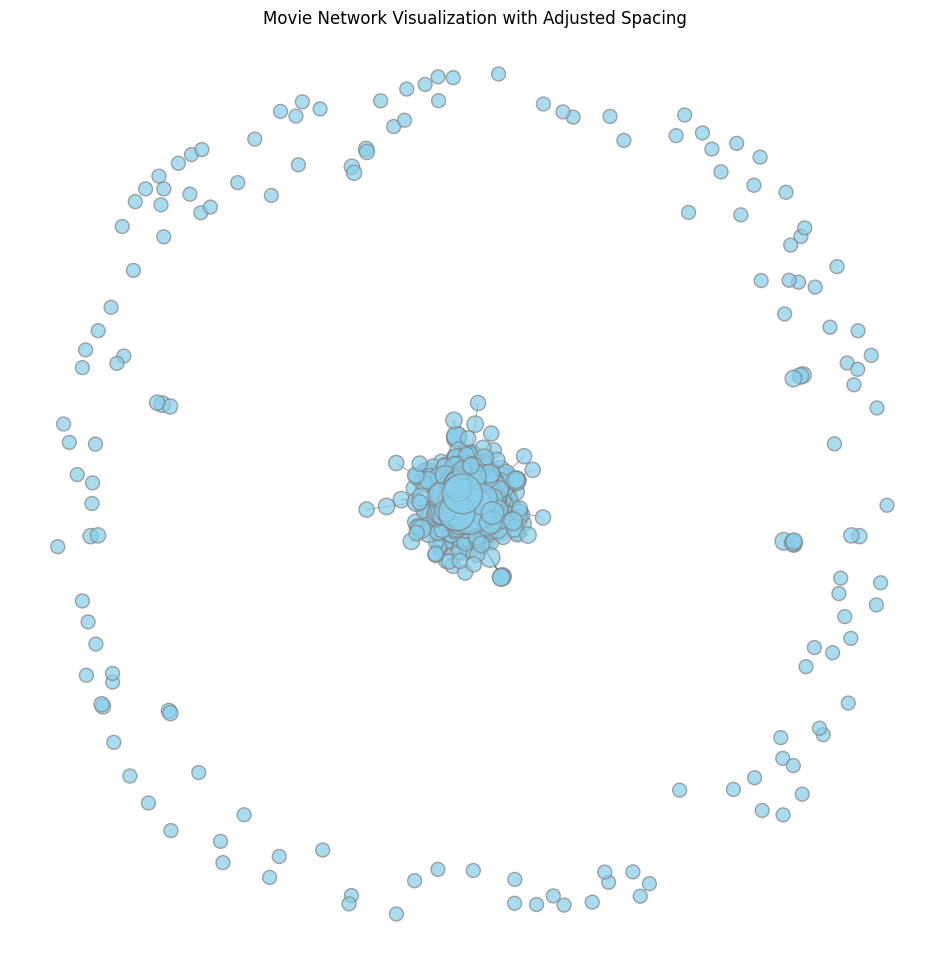

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate node sizes based on degree
node_sizes = [100 + 20 * movie_graph.degree(node) for node in movie_graph.nodes]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(movie_graph, seed=42)

# Draw nodes with varying size
nx.draw_networkx_nodes(movie_graph, pos, node_size=node_sizes, node_color="skyblue", alpha=0.7, edgecolors="gray")

# Draw edges
nx.draw_networkx_edges(movie_graph, pos, width=0.5, alpha=0.5)

plt.title("Movie Network Visualization with Adjusted Spacing")
plt.axis("off")
plt.show()


## Plot the extracted largest component

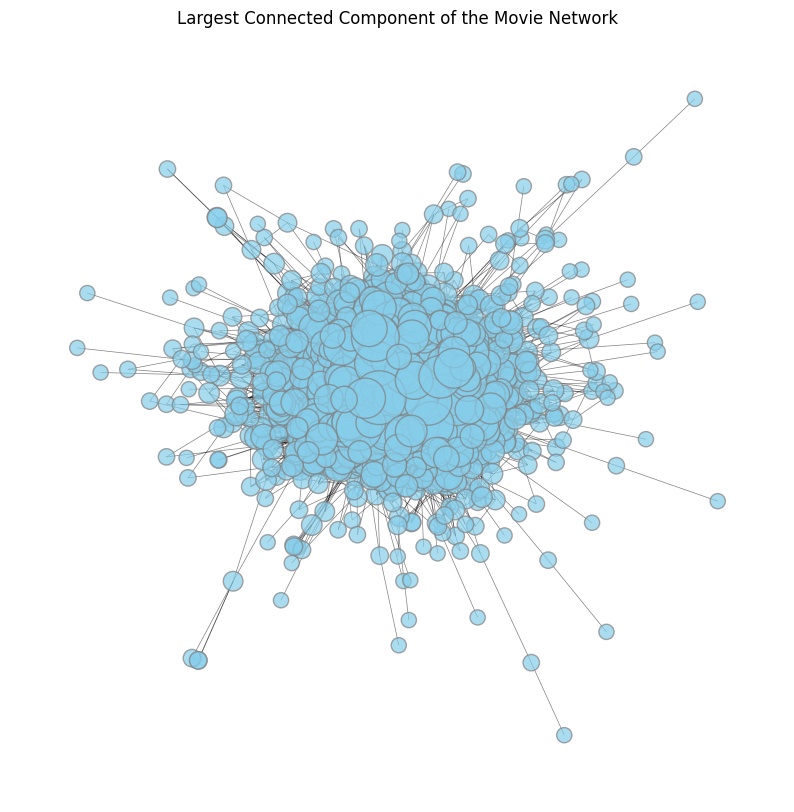

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


# Calculate node sizes based on degree in the subgraph
node_sizes = [100 + 20 * graph_largest.degree(node) for node in graph_largest.nodes]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph_largest, seed=42)

# Draw nodes with varying size
nx.draw_networkx_nodes(graph_largest, pos, node_size=node_sizes, node_color="skyblue", alpha=0.7, edgecolors="gray")

# Draw edges
nx.draw_networkx_edges(graph_largest, pos, width=0.5, alpha=0.5)

plt.title("Largest Connected Component of the Movie Network")
plt.axis("off")
plt.show()


### Kamada layout   

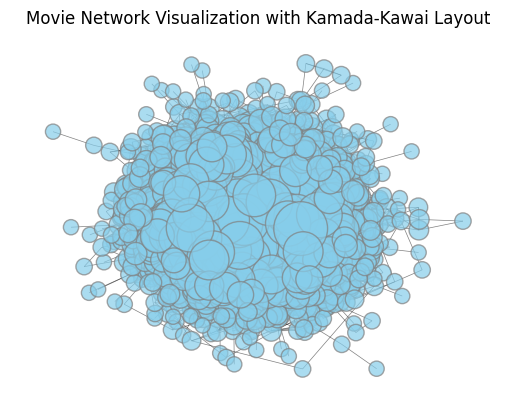

In [16]:
# Use Kamada-Kawai layout instead
pos = nx.kamada_kawai_layout(graph_largest)

nx.draw_networkx_nodes(graph_largest, pos, node_size=node_sizes, node_color="skyblue", alpha=0.7, edgecolors="gray")
nx.draw_networkx_edges(graph_largest, pos, width=0.5, alpha=0.5)
plt.title("Movie Network Visualization with Kamada-Kawai Layout")
plt.axis("off")
plt.show()
